# Plotting the boundary of a neural network

### Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Plotting functions

In [12]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels, point_size=25):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = point_size,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = point_size,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def plot_function(f):
    plot_points(X, y, 100)

    def h(x,y):
        return f(x,y)>=0.5
    xx, yy = np.meshgrid(np.arange(-0.5,3,0.005),
                         np.arange(-0.5,3,0.005))
    Z = np.array([h(i[0], i[1]) for i in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.25, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plt.show()

### The dataset

In [3]:
alien_dataset = pd.DataFrame({
    'aack':[1,2,0,0,1,1,2,2],
    'beep':[0,0,1,2,1,2,1,2],
    'happy': [0,0,0,0,1,1,1,1]})

X = alien_dataset[['aack', 'beep']]
y = alien_dataset['happy']

In [13]:
def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def line_1(a,b):
    return step(6*a + 10*b - 15)

def line_2(a,b):
    return step(10*a + 6*b - 15)

def bias(a,b):
    return 1

def nn_with_step(a,b):
    return step(step(6*a + 10*b - 15) + step(10*a + 6*b - 15) - 1.5)

def sigmoid(x):
    return np.exp(x)/(1.0 + np.exp(x))

def nn_with_sigmoid(a,b):
    return sigmoid(1.0*sigmoid(6*a + 10*b - 15) + 1.0*sigmoid(10*a + 6*b - 15) - 1.5)

### Boundaries of the first layer (linear classifiers and bias)

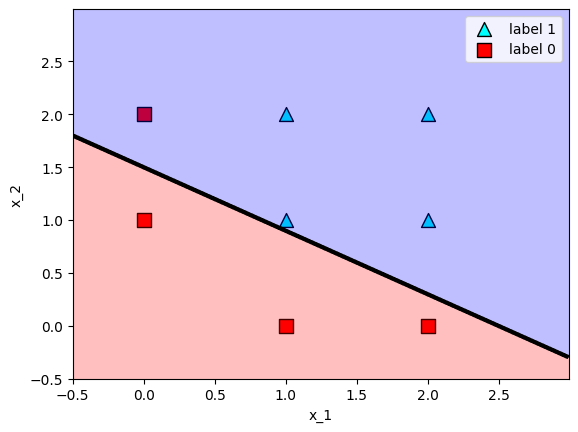

In [14]:
plot_function(line_1)

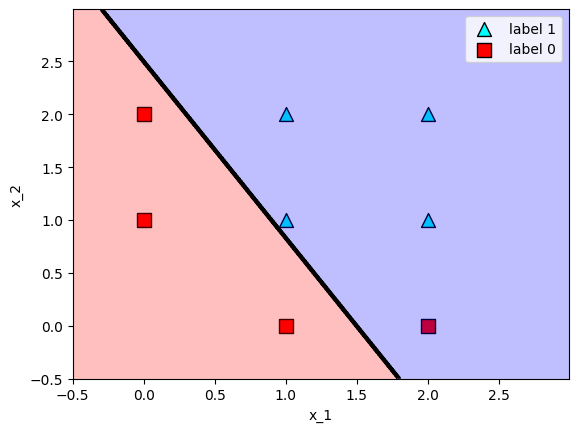

In [15]:
plot_function(line_2)

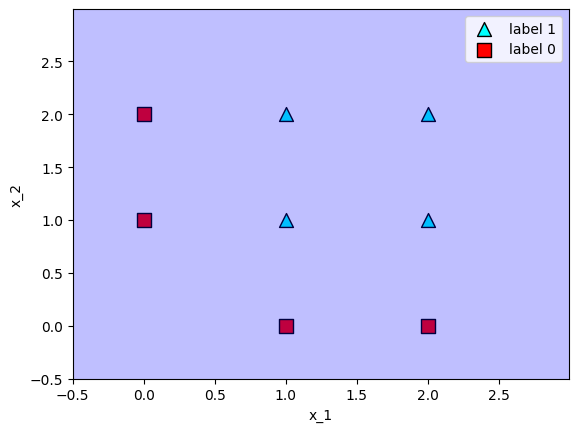

In [16]:
plot_function(bias)

### Boundaries of the second layer (non-linear classifiers)

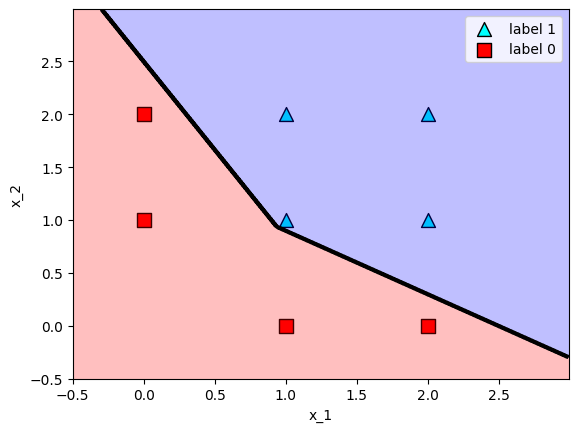

In [17]:
plot_function(nn_with_step)

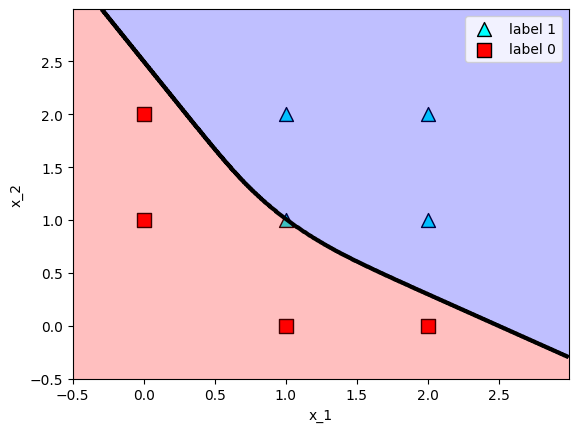

In [18]:
plot_function(nn_with_sigmoid)